In [1]:
#Loads the MNIST dataset & Create first 9 images in training dataset

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


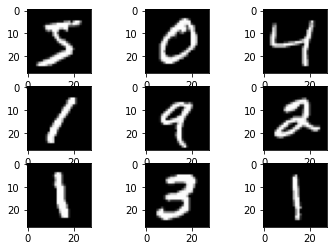

In [2]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    
#display figure
pyplot.show()

In [3]:
# reshape dataset to have a single channel

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [4]:
# one hot encode target value
from keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
# normalize the pixel values of graysacale images
# 1) converting the data type 
# 2) dividing pixel values by the max value

# convert from integers to floats
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
trainX_norm = trainX_norm / 255.0
testX_norm = testX_norm / 255.0

In [6]:
#Split data into training and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(trainX_norm, trainY, test_size = 0.1, random_state=20)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Dense
from keras.optimizers import RMSprop, Adam, SGD
#Define CNN model

#Initialize model
model = Sequential()

#First input layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

#Pooling Layer
model.add(MaxPooling2D((2, 2)))

#Dropout Layer
model.add(Dropout(0.20))

#Flattening Layer
model.add(Flatten())

#Dense Layers
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#display model
model.summary() 

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [8]:
# Fit the Model 
history = model.fit(X_train, Y_train, batch_size = 250, 
          epochs = 50, verbose = 1, validation_data = (X_val, Y_val),
          steps_per_epoch = X_train.shape[0] // 250)

Epoch 1/50
216/216 [==============================] - 16s 71ms/step - loss: 0.6565 - accuracy: 0.7936 - val_loss: 0.1709 - val_accuracy: 0.9517
Epoch 2/50
216/216 [==============================] - 13s 62ms/step - loss: 0.1776 - accuracy: 0.9477 - val_loss: 0.1257 - val_accuracy: 0.9648
Epoch 3/50
216/216 [==============================] - 14s 63ms/step - loss: 0.1218 - accuracy: 0.9640 - val_loss: 0.0973 - val_accuracy: 0.9738
Epoch 4/50
216/216 [==============================] - 14s 66ms/step - loss: 0.0958 - accuracy: 0.9726 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 5/50
216/216 [==============================] - 15s 68ms/step - loss: 0.0795 - accuracy: 0.9771 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 6/50
216/216 [==============================] - 14s 65ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.0668 - val_accuracy: 0.9810
Epoch 7/50
216/216 [==============================] - 13s 60ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0631 - val_accuracy:

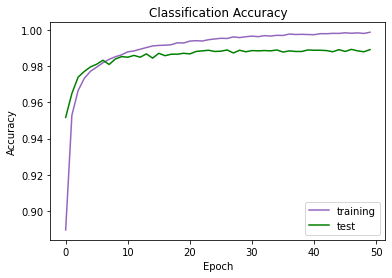

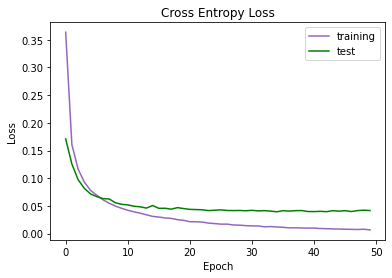

In [9]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], color='tab:purple')
plt.plot(history.history['val_accuracy'], color='g')
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'], color='tab:purple')
plt.plot(history.history['val_loss'], color='g')
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'test'], loc='best')
plt.show()


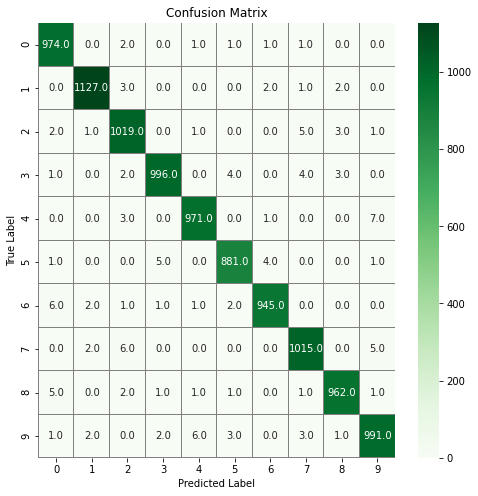

In [12]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

#Confusion matrix: Used to evaluate how well the model is predicting our test dataset

# predict the values from the test dataset
Y_pred = model.predict(testX_norm)

# convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# convert test observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()